In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [156]:
df = pd.read_csv("salaries_clean.csv",encoding="Latin-1") # okunmayan değerler olduğu için hata aldık. encoding yazarak sorunu çözdük.

### About Data

Veriyi buradan aldık: https://data.world/brandon-telle/2016-hacker-news-salary-survey-results

In [157]:
df.head()

,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,1,opower,"san francisco, ca",CA,US,38,-122,systems engineer,Engineering,NaN,13,2,125000,5000,0,5000 shares,Don't work here.,3/21/16 12:58
1,3,walmart,"bentonville, ar",AR,US,36,-94,senior developer,Software,Senior,15,8,65000,NaN,5000,"3,000",NaN,3/21/16 12:58
2,4,vertical knowledge,"cleveland, oh",OH,US,41,-82,software engineer,Software,NaN,4,1,86000,5000,6000,0,NaN,3/21/16 12:59
3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4,0,105000,5000,8500,0,NaN,3/21/16 13:00
4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4,3,110000,5000,7000,150000,NaN,3/21/16 13:02


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary_id                  1655 non-null   int64  
 1   employer_name              1651 non-null   object 
 2   location_name              1655 non-null   object 
 3   location_state             558 non-null    object 
 4   location_country           792 non-null    object 
 5   location_latitude          792 non-null    float64
 6   location_longitude         792 non-null    float64
 7   job_title                  1655 non-null   object 
 8   job_title_category         1655 non-null   object 
 9   job_title_rank             425 non-null    object 
 10  total_experience_years     1608 non-null   float64
 11  employer_experience_years  1608 non-null   float64
 12  annual_base_pay            1651 non-null   float64
 13  signing_bonus              1332 non-null   float

In [159]:
df.isna().sum()

salary_id                       0
employer_name                   4
location_name                   0
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title                       0
job_title_category              0
job_title_rank               1230
total_experience_years         47
employer_experience_years      47
annual_base_pay                 4
signing_bonus                 323
annual_bonus                  319
stock_value_bonus             409
comments                     1363
submitted_at                    0
dtype: int64

In [160]:
print("Empty values: %", round(df.isnull().sum().sum() / (len(df) * len(df.columns))*100))

Empty values: % 25


In [161]:
df.describe()

,salary_id,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,1655,792,792,1608,1608,1651,1332,1336
mean,1684,38,-65,7,3,6325004,22406,11776
std,933,17,67,6,3,246135277,309799,69216
min,1,-41,-123,0,0,0,0,0
25%,897,37,-103,3,1,61000,0,0
50%,1711,39,-95,5,2,99480,0,500
75%,2477,45,-65,10,3,130000,5000,10000
max,3298,65,174,56,58,9999999999,8999999,2000000


In [162]:
df


,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,1,opower,"san francisco, ca",CA,US,38,-122,systems engineer,Engineering,NaN,13,2,125000,5000,0,5000 shares,Don't work here.,3/21/16 12:58
1,3,walmart,"bentonville, ar",AR,US,36,-94,senior developer,Software,Senior,15,8,65000,NaN,5000,"3,000",NaN,3/21/16 12:58
2,4,vertical knowledge,"cleveland, oh",OH,US,41,-82,software engineer,Software,NaN,4,1,86000,5000,6000,0,NaN,3/21/16 12:59
3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4,0,105000,5000,8500,0,NaN,3/21/16 13:00
4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4,3,110000,5000,7000,150000,NaN,3/21/16 13:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,3289,sparkfun electronics,"boulder, co",CO,US,40,-105,junior software developer,Software,Junior,1,0,60500,0,800,0,NaN,3/23/16 8:24
1651,3290,intel,europe,NaN,NaN,NaN,NaN,staff software enginer,Software,NaN,6,4,164000,0,20000,30000 USD,NaN,3/23/16 8:27
1652,3293,$2bn valuation tech company,nyc,NaN,NaN,NaN,NaN,sr. frontend eng,Web,Senior,7,1,150000,0,0,0,NaN,3/23/16 8:41
1653,3294,of maryland,"college park, md",MD,US,39,-77,scientific programmer (faculty research assist...,Applied Science,NaN,5,1,75000,NaN,NaN,NaN,NaN,3/23/16 8:43


In [163]:
df[df["job_title_rank"] == "Intern"].head(10)

,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
18,40,oracle,"bala cynwyd, pa",PA,US,40,-75,student intern co-op,Other,Intern,0,0,24,0,0,$0,NaN,3/21/16 13:06
111,256,american express,"phoenix, arizona",AZ,US,33,-112,intern,Other,Intern,0,0,60000,5000,NaN,NaN,"Summer Intern, June-August",3/21/16 13:25
158,373,verizon,tampa,NaN,NaN,NaN,NaN,internal help desk,Other,Intern,4,4,38000,0,3000,NaN,NaN,3/21/16 13:32
207,470,facebook,menlo park,NaN,NaN,NaN,NaN,software engineering intern,Software,Intern,1,0,96000,0,0,0,NaN,3/21/16 13:39
263,568,ibm watson research,"yorktown,ny",NaN,NaN,NaN,NaN,research intern,Other,Intern,0,1,100000,0,0,0,NaN,3/21/16 13:44
385,838,sandia national laboratories,"albuquerque, new mexico",NaN,MX,23,-102,research intern,Other,Intern,2,0,46000,0,0,0,NaN,3/21/16 14:00
415,900,minted,san francisco,NaN,NaN,NaN,NaN,software intern,Software,Intern,1,0,74400,NaN,NaN,NaN,NaN,3/21/16 14:05
458,991,workday,pleasanton,NaN,NaN,NaN,NaN,summer intern,Other,Intern,0,0,32,0,0,0,housing + food,3/21/16 14:11
461,997,bioinformatics company,nijmegen,NaN,NaN,NaN,NaN,internship,Other,Intern,0,0,12000,0,0,0,This is my final internship after which I will...,3/21/16 14:12
590,1262,bisite research group,"salamanca, spain",NaN,ES,40,-4,intern software engineer,Software,Intern,4,0,5160,0,0,0,NaN,3/21/16 14:33


## Clean the Data

In [164]:
df.columns

Index(['salary_id', 'employer_name', 'location_name', 'location_state',
       'location_country', 'location_latitude', 'location_longitude',
       'job_title', 'job_title_category', 'job_title_rank',
       'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus', 'stock_value_bonus',
       'comments', 'submitted_at'],
      dtype='object')

In [165]:
df = df.drop(['salary_id','location_name', 'location_state',
       'location_country', 'location_latitude', 'location_longitude','job_title_rank','comments','stock_value_bonus',
       'submitted_at'],axis =1)

In [166]:
df.head()

,employer_name,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,opower,systems engineer,Engineering,13,2,125000,5000,0
1,walmart,senior developer,Software,15,8,65000,NaN,5000
2,vertical knowledge,software engineer,Software,4,1,86000,5000,6000
3,netapp,mts,Other,4,0,105000,5000,8500
4,apple,software engineer,Software,4,3,110000,5000,7000


In [167]:
df.isna().sum()

employer_name                  4
job_title                      0
job_title_category             0
total_experience_years        47
employer_experience_years     47
annual_base_pay                4
signing_bonus                323
annual_bonus                 319
dtype: int64

In [168]:
df = df.dropna(subset=["employer_name","annual_base_pay"]) # içindeki NaN değerleri attık. subset burada belirtili sütunları seçmemizi sağladı.

In [169]:
df.isna().sum()

employer_name                  0
job_title                      0
job_title_category             0
total_experience_years        44
employer_experience_years     44
annual_base_pay                0
signing_bonus                318
annual_bonus                 314
dtype: int64

In [170]:
df[["signing_bonus","annual_bonus"]] = df[["signing_bonus","annual_bonus"]].fillna(0) # bu sütunları da 0 ile doldurduk.

In [171]:
df.isna().sum()

employer_name                 0
job_title                     0
job_title_category            0
total_experience_years       44
employer_experience_years    44
annual_base_pay               0
signing_bonus                 0
annual_bonus                  0
dtype: int64

In [172]:
df[["total_experience_years","employer_experience_years"]] = df[["total_experience_years",
                                                                 "employer_experience_years"]].fillna(round(df[["total_experience_years",
                                                                                                                "employer_experience_years"]].mean()))
# burdakileri de ortalamalarıyla doldurdum.

In [173]:
df.isna().sum()

employer_name                0
job_title                    0
job_title_category           0
total_experience_years       0
employer_experience_years    0
annual_base_pay              0
signing_bonus                0
annual_bonus                 0
dtype: int64

In [174]:
pd.set_option("display.float_format", lambda x: "%0.f" % x) # pd.set_option(option_name, option_value)

In [175]:
df["annual_base_pay"].sort_values() # burada bulunan 999999... gibi yada 0, 24 gibi uç değerleri istemiyorum.

1361            0
1143            0
382             0
18             24
306            28
          ...    
221       9250000
1088     10280000
1639     50000000
1135    156000000
1645   9999999999
Name: annual_base_pay, Length: 1647, dtype: float64

In [176]:
df = df[(df["annual_base_pay"] < 90_000_000) & (df["annual_base_pay"] > 5000)]

In [177]:
df["annual_base_pay"].sort_values()

590        5160
407        5600
1642       6000
126        6000
1341       6031
         ...   
1191    7500000
298     9000000
221     9250000
1088   10280000
1639   50000000
Name: annual_base_pay, Length: 1597, dtype: float64

## Scatter plots

In [178]:
df.columns

Index(['employer_name', 'job_title', 'job_title_category',
       'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus'],
      dtype='object')

In [179]:
df.rename(columns = {
    'employer_name':'company',
    'job_title':'title',
    'job_title_category':'category',
    'total_experience_years':'total_exp',
    'employer_experience_years':'local_exp',
    'annual_base_pay':'salary'
}, inplace = True)


# anlaşılır olsun diye böyle bir sözlük veri yapısı oluşturdum.

In [180]:
df.tail()

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1648,facebook,software engineer,Software,4,2,130000,20000,13000
1650,sparkfun electronics,junior software developer,Software,1,0,60500,0,800
1651,intel,staff software enginer,Software,6,4,164000,0,20000
1652,$2bn valuation tech company,sr. frontend eng,Web,7,1,150000,0,0
1653,of maryland,scientific programmer (faculty research assist...,Applied Science,5,1,75000,0,0


'\nŞimdi burada yaklaşık 28 yıl toplam tecrübesi olan adamın şirkette 60 seneye yakın deneyimi olması saçma değil mi ? \nBu yüzden bunun gibi eğrinin üstünde ve altında olan değerleri çıkarıyorum.\n'

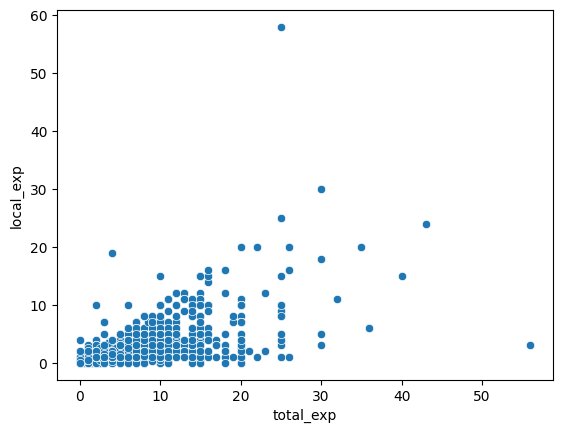

In [181]:
sns.scatterplot(df,y="local_exp", x="total_exp")
"""
Şimdi burada yaklaşık 28 yıl toplam tecrübesi olan adamın şirkette 60 seneye yakın deneyimi olması saçma değil mi ? 
Bu yüzden bunun gibi eğrinin üstünde ve altında olan değerleri çıkarıyorum.
"""

In [182]:
df["local_exp"].idxmax()

1596

In [183]:
df.loc[1596]

company            tom
title              tom
category         Other
total_exp           25
local_exp           58
salary          250000
signing_bonus   250478
annual_bonus    150000
Name: 1596, dtype: object

In [184]:
# şimdi bunun gibi eğer local exp > total exp ise o verileri atıcaz 

In [185]:
df[df["local_exp"] > df["total_exp"]].iloc[8:12]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
339,airbnb,software engineer,Software,0,1,110000,50000,0
347,microsoft,software engineer,Software,1,2,120000,200000,0
447,johns hopkins,phd student,Other,2,4,24000,0,0
605,la michoacana,servidor de aguas,Other,3,7,48000,0,0


In [186]:
df = df[(df["local_exp"] -1 ) < df["total_exp"]]

<Axes: xlabel='total_exp', ylabel='local_exp'>

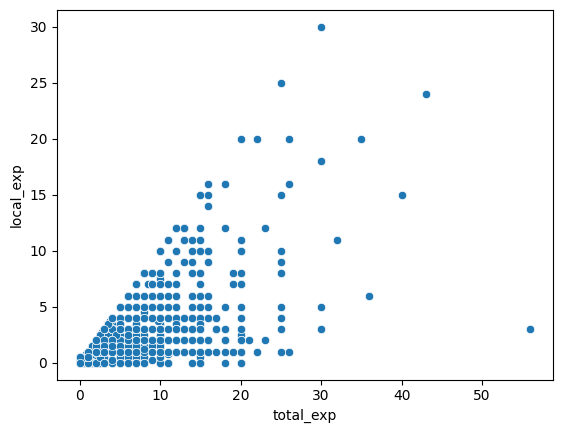

In [187]:
sns.scatterplot(df,x="total_exp",y="local_exp")

In [188]:
df[df["total_exp"]>50]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1422,ghgh,ghghgh,Other,56,3,565656,5656,566


In [189]:
#hatta bunun gibi 30 yıldan fazla toplam deneyimi olanlarda sanki hatalı veriler var 1422 ve 1555 gibi. bunları da atalım

df[df["total_exp"]> 30] 

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
34,city of austin,it programmer,Other,40,15,103000,0,1500
335,gg,pres,Other,35,20,75000,2000,3000
970,ibm,advisory software engineer,Software,32,11,111000,0,1200
1422,ghgh,ghghgh,Other,56,3,565656,5656,566
1550,hewlett packard enterprise,software engineer vii,Software,36,6,206000,0,15000
1555,ãÜ___¡,asdf,Other,43,24,23423,234,2


In [190]:
df = df.set_index(np.arange(0,len(df)))

In [191]:
df[df["total_exp"]> 30] 

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
31,city of austin,it programmer,Other,40,15,103000,0,1500
319,gg,pres,Other,35,20,75000,2000,3000
920,ibm,advisory software engineer,Software,32,11,111000,0,1200
1340,ghgh,ghghgh,Other,56,3,565656,5656,566
1462,hewlett packard enterprise,software engineer vii,Software,36,6,206000,0,15000
1467,ãÜ___¡,asdf,Other,43,24,23423,234,2


In [192]:
df.drop(df.index[[1340,1467]],inplace=True)

In [193]:
df.iloc[[1340,1467]]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1341,ali,pagla dancer,Other,9,5,550000,20000,200000
1469,laika,systems administrator,Management,7,0,77000,0,2000


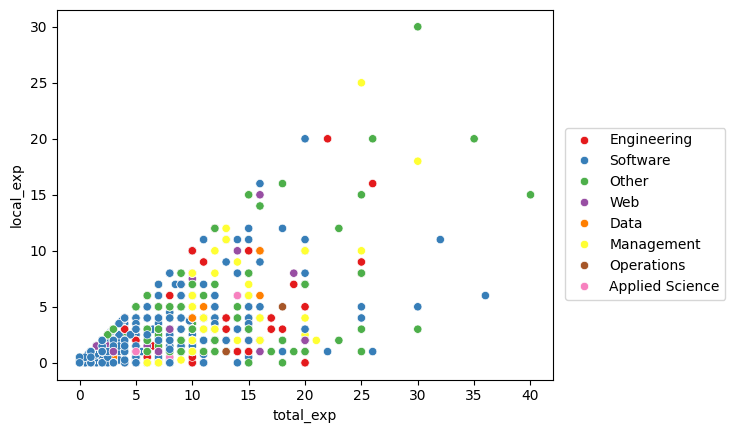

In [194]:
sns.scatterplot(df, x="total_exp",y="local_exp",hue="category",palette="Set1")
plt.legend(bbox_to_anchor=(1.01,0.7))

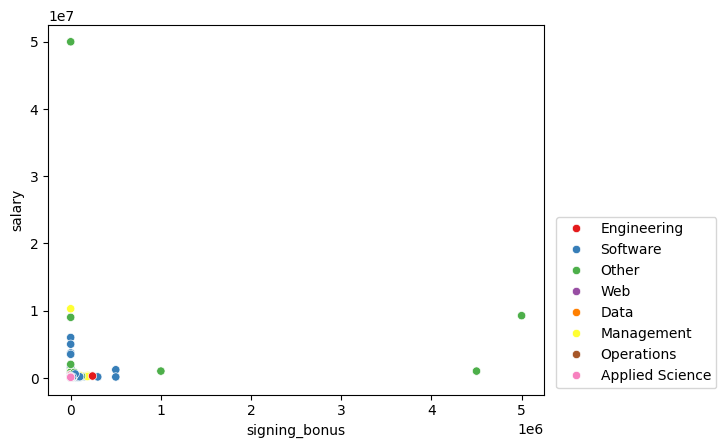

In [195]:
sns.scatterplot(df, x="signing_bonus",y="salary",hue="category",palette="Set1")
plt.legend(bbox_to_anchor=(1.01,0.5))

## HİSTOGRAMLARI ÇİZDİRELİM

<Axes: xlabel='salary', ylabel='Count'>

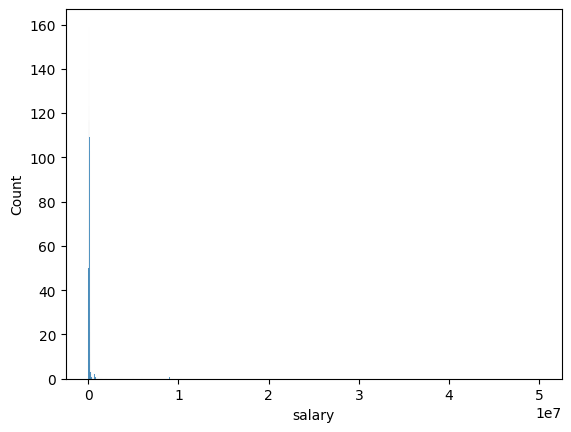

In [196]:
sns.histplot(df,x="salary")


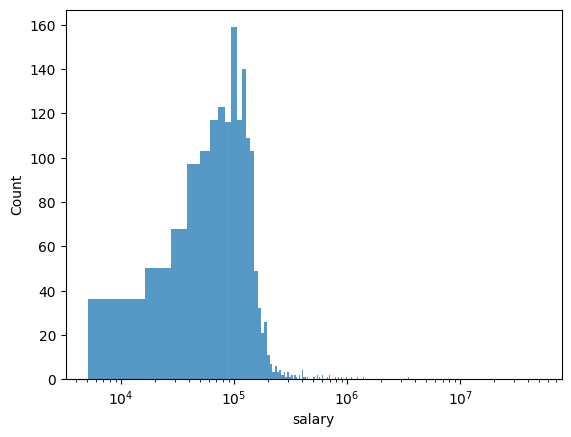

In [197]:
sns.histplot(df,x="salary") 
plt.xscale("log")              #$$ ortalama en yüksek maaş 100.000 dolar civarıymış.

In [198]:
len(df[df["salary"]> 500_000]) / len(df) # %2 si 500 bin dolardan fazla maaş alıyormuş

0.020552344251766216

(5000.0, 250000.0)

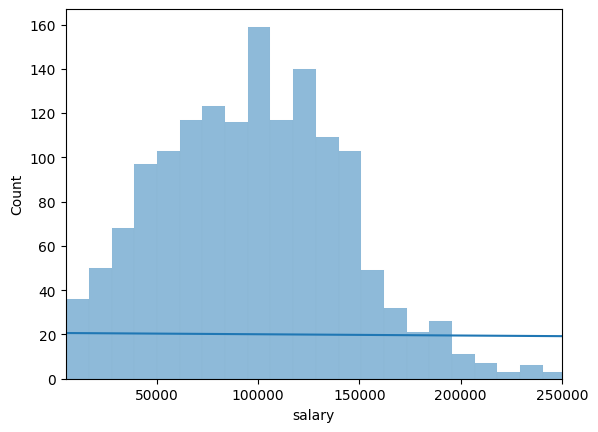

In [199]:
sns.histplot(df,x="salary",kde=True)
plt.xlim(5000,250000)

## Countplot bakalım

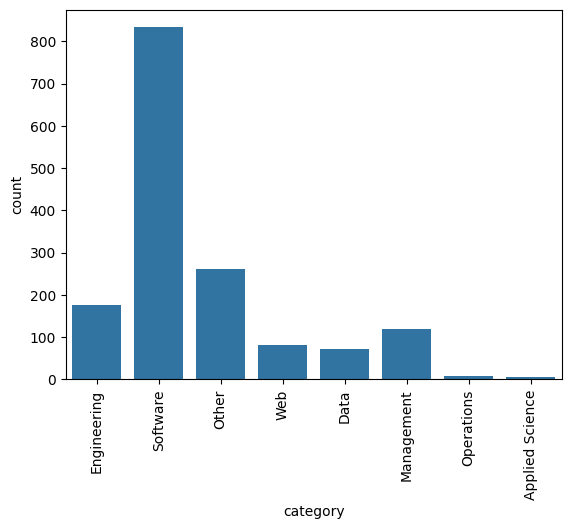

In [200]:
sns.countplot(df,x="category")
plt.xticks(rotation=90); # yazıyı 90 derece çevirdim daha iyi gözüksün diye.

In [201]:
df.value_counts("category") # bunları da üstlerine yazdıralım

category
Software           833
Other              262
Engineering        176
Management         120
Web                 81
Data                71
Operations           8
Applied Science      6
Name: count, dtype: int64

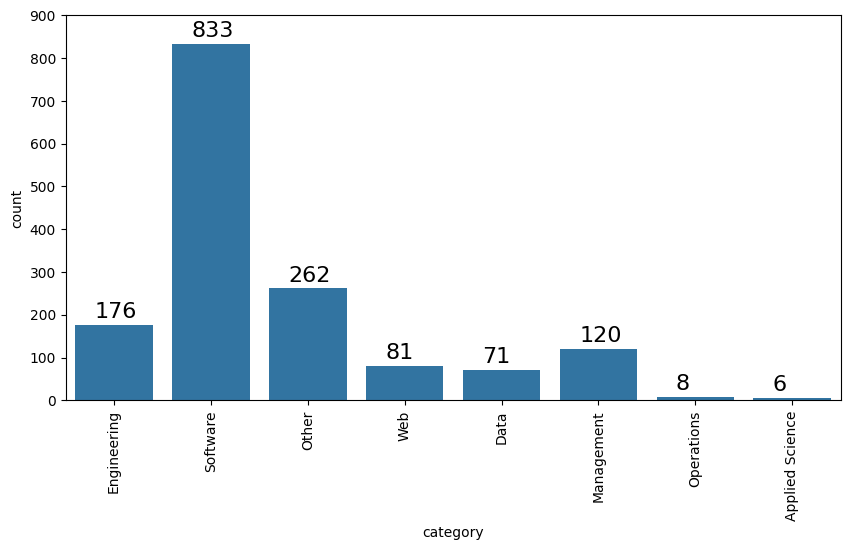

In [202]:
plt.figure(figsize=(10,5), dpi=100)
ax = sns.countplot(data= df, x="category")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+16), size=16)

plt.xticks(rotation=90)
plt.ylim(0,900);

## Kde plot

<Axes: xlabel='total_exp', ylabel='Density'>

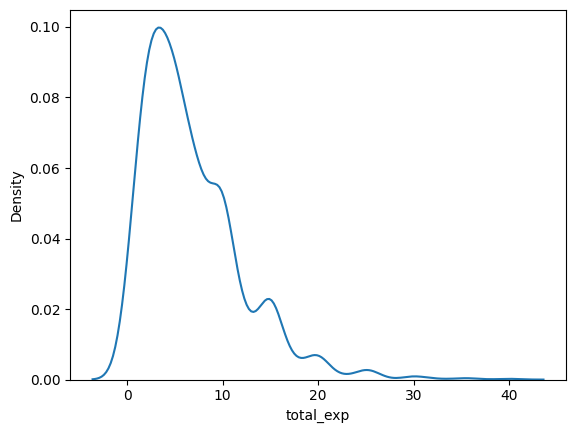

In [203]:
sns.kdeplot(df,x="total_exp")

<Axes: xlabel='local_exp', ylabel='Density'>

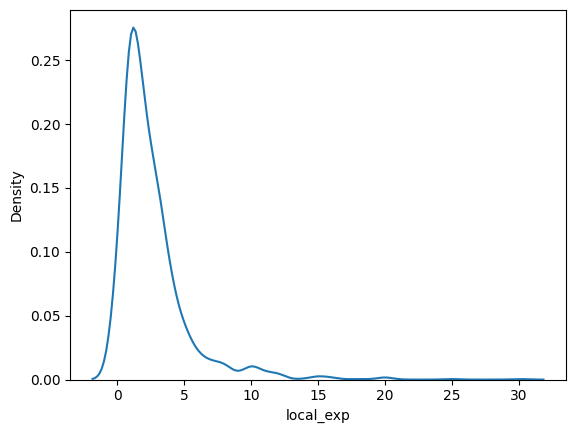

In [204]:
sns.kdeplot(df,x="local_exp")

<Axes: xlabel='local_exp', ylabel='Density'>

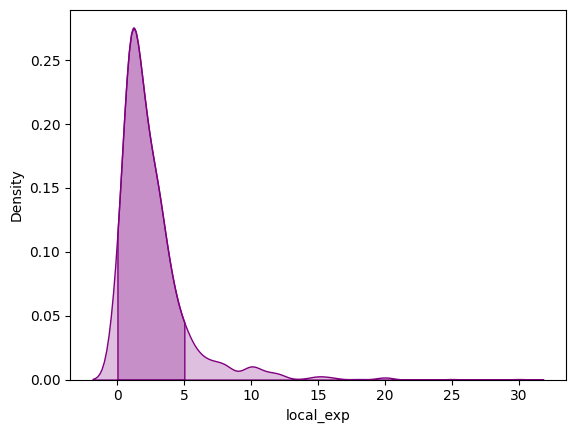

In [205]:
sns.kdeplot(data=df, x="local_exp", clip=[0,5], fill=True, color="purple") # clip kes, fill doldur.
sns.kdeplot(data=df, x="local_exp", fill=True, color="purple")

<Axes: xlabel='local_exp', ylabel='Density'>

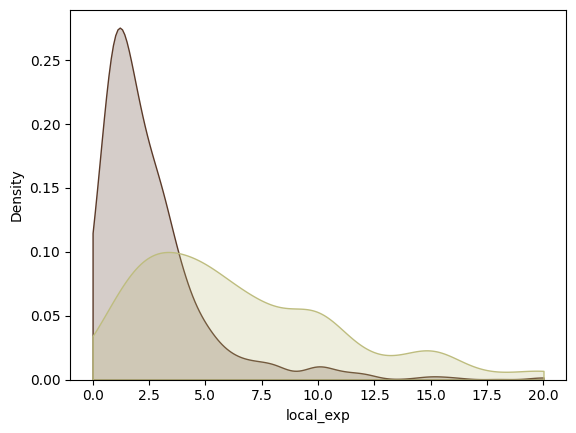

In [206]:
sns.kdeplot(data=df, x="local_exp", clip=[0,20], fill=True, color="#5B3A29")
sns.kdeplot(data=df, x="total_exp", clip=[0,20], fill=True, color="#BEBD7F")